In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pandas as pd

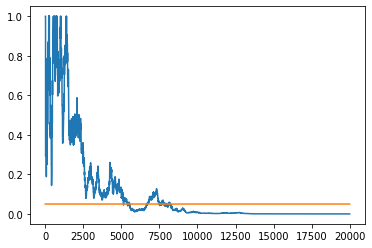

In [7]:
class DataGenerator:
    def __init__(self,p1,p2):
        self.p1 = p1
        self.p2 = p2
        
    # return result of whether person click on ad 1 or ad 2    
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2
def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p

# running experiment
def run_experiment(p1,p2,N):
    data = DataGenerator(p1,p2)
    p_values = np.empty(N)
    T = np.zeros((2,2)).astype(np.float32)
    for i in range(N):
        c1,c2 = data.next()
        T[0,c1] +=1
        T[1,c2] +=1
        if i <10:
            p_values[i] = None # too few samples to get pvalue
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()
run_experiment(0.1, 0.11, 20000)

In [10]:
# determine whether or not the CTRs are statistically significant
data = pd.read_csv('advertisement_clicks.csv')

In [11]:
data.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [12]:
def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p

In [13]:
a = data[data['advertisement_id'] == 'A']
b = data[data['advertisement_id'] == 'B']

a = a['action']
b = b['action']

In [19]:
# Contingency table
A_clk = a.sum()
A_noclk = a.size - a.sum()
B_clk = b.sum()
B_noclk = b.size - b.sum()

# contingency table
#        click       no click
#------------------------------
# ad A |   a            b
# ad B |   c            d

In [21]:
T = np.array([[A_clk, A_noclk], [B_clk, B_noclk]])

In [23]:
get_p_value(T)

0.0013069502732125926